## Deep Learning model using Keras

Please download the dataset from the below url

https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

import os
import numpy as np
import pandas as np

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
print(os.listdir("/content/drive/MyDrive/chest_xray"))

print(os.listdir("/content/drive/MyDrive/chest_xray/train"))

print(os.listdir("/content/drive/MyDrive/chest_xray/train"))


['.DS_Store', 'train', 'test', 'val']
['.DS_Store', 'NORMAL', 'PNEUMONIA']
['.DS_Store', 'NORMAL', 'PNEUMONIA']


NORMAL


<function matplotlib.pyplot.show>

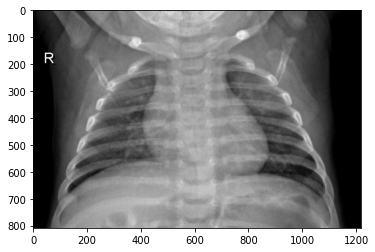

In [ ]:
img_name = 'NORMAL2-IM-0588-0001.jpeg'
img_normal = load_img('/content/drive/MyDrive/chest_xray/train/NORMAL/' + img_name)

print('NORMAL')
plt.imshow(img_normal)
plt.show

PNEUMONIA


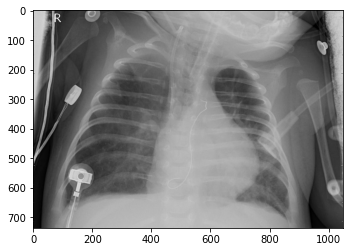

In [ ]:
img_name = 'person63_bacteria_306.jpeg'
img_pneumonia = load_img('/content/drive/MyDrive/chest_xray/train/PNEUMONIA/' + img_name)

print('PNEUMONIA')
plt.imshow(img_pneumonia)
plt.show()

In [ ]:
# dimensions of our images.
img_width, img_height = 150, 150


In [ ]:
train_data_dir = '/content/drive/MyDrive/chest_xray/train'
validation_data_dir = '/content/drive/MyDrive/chest_xray/val'
test_data_dir = '/content/drive/MyDrive/chest_xray/test'

nb_train_samples = 5217
nb_validation_samples = 17
epochs = 20
batch_size = 16

In [ ]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.layers

In [ ]:
model.input

<KerasTensor: shape=(None, 150, 150, 3) dtype=float32 (created by layer 'conv2d_input')>

In [ ]:
model.output

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'activation_4')>

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [ ]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


In [ ]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 5216 images belonging to 2 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 16 images belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 624 images belonging to 2 classes.


In [ ]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

AttributeError: ignored

In [ ]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
326/326 [==============================] - 1582s 5s/step - loss: 0.5228 - accuracy: 0.7757 - val_loss: 0.6048 - val_accuracy: 0.6875
Epoch 2/20
326/326 [==============================] - 79s 241ms/step - loss: 0.3058 - accuracy: 0.8800 - val_loss: 1.0783 - val_accuracy: 0.6250
Epoch 3/20
326/326 [==============================] - 77s 237ms/step - loss: 0.2763 - accuracy: 0.8955 - val_loss: 0.5776 - val_accuracy: 0.6875
Epoch 4/20
326/326 [==============================] - 78s 238ms/step - loss: 0.2218 - accuracy: 0.9146 - val_loss: 1.8313 - val_accuracy: 0.6250
Epoch 5/20
326/326 [==============================] - 76s 233ms/step - loss: 0.2288 - accuracy: 0.9160 - val_loss: 0.8087 - val_accuracy: 0.6875
Epoch 6/20
326/326 [==============================] - 76s 233ms/step - loss: 0.2148 - accuracy: 0.9215 - val_loss: 2.0943 - val_accuracy: 0.6250
Epoch 7/20
326/326 [==============================] - 76s 232ms/step - loss: 0.1906 - accuracy: 0.9326 - val_loss: 0.5607 - val_acc

In [ ]:
model.save('my_model.h5')

In [ ]:
# evaluate the model
scores = model.evaluate_generator(test_generator)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '



accuracy: 83.17%
